# Solidification of Aluminium: Semi-infinite Stefan problem

Here, we consider the solidification of Aluminium on a wall at temperature T_w into an infinite volume of liquid at temperature T_inf.

In [26]:
# import required libraries

import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
from scipy.special import erf, erfc
import matplotlib

% matplotlib inline

In [27]:
# Define some parameters for Aluminium

rho = 2700       # density            Kg/m^3
L_f = 398000     # Heat of fusion     J/Kg
C_p = 910        # Specific heat      J/(Kg.K)
T_m = 933.47     # Melting point      K

k_s = 220        # Conductivity of solid    W/(m.K) (value at 527 C)
k_l = 94         # Conductivity of liquid   W/(m.K) (value at 665 C)

a_s = k_s/(rho*C_p)  # Thermal diffusivity of solid
a_l = k_l/(rho*C_p)  # Thermal diffusivity of liquid

To solve the temperature profiles and the interface position as a function of time, we first need to solve for $\zeta_f^s$ using the following equation:

$$\rho \zeta_f^s \sqrt{\alpha^s} L_f + \frac{k^l(T_m - T_{\infty})}{\sqrt{\alpha^l \pi} erfc(\sqrt{\frac{\alpha^s}{\alpha^l}} \zeta_f^s)} e^{-{\zeta_f^s}^2\frac{\alpha^s}{\alpha^l}} - \frac{k^s(T_m - T_w)}{\sqrt{\alpha^s \pi} erf(\zeta_f^s)} e^{-{\zeta_f^s}^2} = 0$$ 

where erf() and erfc() are the error function and its conjugate respectively

In [28]:
def zeta_function(zeta, T_w, T_inf):
    
    a = rho*zeta*np.sqrt(a_s)*L_f
    b = (k_l/np.sqrt(a_l))*(T_m - T_inf)/(np.sqrt(np.pi)*erfc(zeta*np.sqrt(a_s/a_l)))*np.exp(-np.power(zeta,2)*a_s/a_l)
    c = (k_s/np.sqrt(a_s))*(T_m - T_w)/(np.sqrt(np.pi)*erf(zeta))*np.exp(-np.power(zeta,2))
    
    return a+b-c

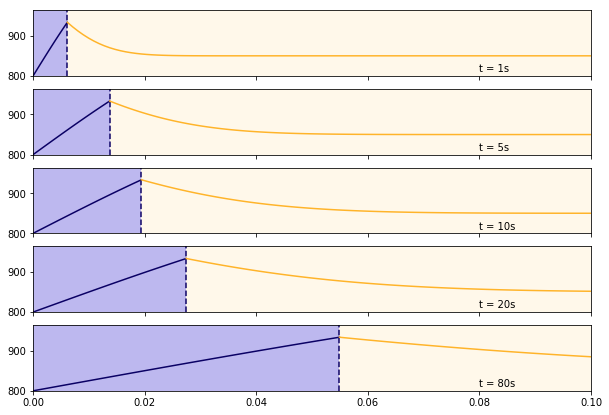

In [29]:
# lets solve for one temp

T_w = 800
T_inf = 850

zeta_fs = opt.fsolve(zeta_function, 0.1, args=(T_w,T_inf))

A = 2*(T_m - T_w)/(np.sqrt(np.pi)*erf(zeta_fs))
B = -2*(T_m - T_inf)/(np.sqrt(np.pi)*erfc(zeta_fs*np.sqrt(a_s/a_l)))

times_list = [1,5,10,20,80]
x_max = 0.1

fig,axes = plt.subplots(len(times_list),1,sharex=True,figsize = (10,7))

for t in times_list:
    
    x_f = zeta_fs*np.sqrt(4*a_s*t)
    tees = np.array([[x, T_w + A*np.sqrt(np.pi)/2*erf(x/np.sqrt(4*a_s*t))] for x in np.linspace(0,x_f,100)])
    teel = np.array([[x, T_inf - B*np.sqrt(np.pi)/2*erfc(x/np.sqrt(4*a_l*t))] for x in np.linspace(x_f,x_max,100)])

    axes[times_list.index(t)].set_xlim(0,x_max)
    axes[times_list.index(t)].set_ylim(min(T_w,T_inf),T_m+30)
    
    axes[times_list.index(t)].text(0.08,810,'t = '+str(t)+'s')
    axes[times_list.index(t)].axvline(x_f,linestyle='--',c='#0a0064')
    
    axes[times_list.index(t)].plot(tees[:,0],tees[:,1],c='#0a0064')
    axes[times_list.index(t)].plot(teel[:,0],teel[:,1], c='#ffb42a')
    
    sol_patch = matplotlib.patches.Rectangle((0,0),x_f,T_m+50,color='#bdb8ef')
    axes[times_list.index(t)].add_patch(sol_patch)
    
    liq_patch = matplotlib.patches.Rectangle((x_f,0),x_max,T_m+50,color='#fff8ea')
    axes[times_list.index(t)].add_patch(liq_patch)



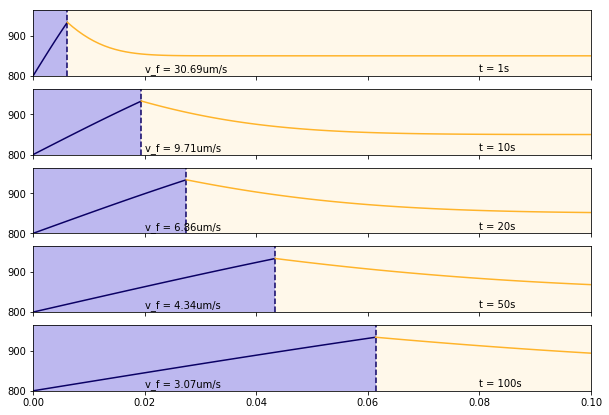

In [32]:
# Let's create a function to solve for zeta, and plot temperature profiles for different times
# Given values of T_w. T_inf

def plot_profiles(T_w, T_inf, times_list, x_max):
    
    zeta_fs = opt.fsolve(zeta_function, 0.1, args=(T_w,T_inf))

    A = 2*(T_m - T_w)/(np.sqrt(np.pi)*erf(zeta_fs))
    B = -2*(T_m - T_inf)/(np.sqrt(np.pi)*erfc(zeta_fs*np.sqrt(a_s/a_l)))

    fig,axes = plt.subplots(len(times_list),1,sharex=True,figsize = (10,7))

    for t in times_list:

        x_f = zeta_fs*np.sqrt(4*a_s*t)
        tees = np.array([[x, T_w + A*np.sqrt(np.pi)/2*erf(x/np.sqrt(4*a_s*t))] for x in np.linspace(0,x_f,100)])
        teel = np.array([[x, T_inf - B*np.sqrt(np.pi)/2*erfc(x/np.sqrt(4*a_l*t))] for x in np.linspace(x_f,x_max,100)])

        axes[times_list.index(t)].set_xlim(0,x_max)
        axes[times_list.index(t)].set_ylim(min(T_w,T_inf),T_m+30)

        axes[times_list.index(t)].text(0.08,810,'t = '+str(t)+'s')
        axes[times_list.index(t)].text(0.02,810,'v_f = '+str(np.round(zeta_fs[0]*np.sqrt(a_s/t)*10000,2))+'um/s')
        axes[times_list.index(t)].axvline(x_f,linestyle='--',c='#0a0064')

        axes[times_list.index(t)].plot(tees[:,0],tees[:,1],c='#0a0064')
        axes[times_list.index(t)].plot(teel[:,0],teel[:,1], c='#ffb42a')

        sol_patch = matplotlib.patches.Rectangle((0,0),x_f,T_m+50,color='#bdb8ef')
        axes[times_list.index(t)].add_patch(sol_patch)

        liq_patch = matplotlib.patches.Rectangle((x_f,0),x_max,T_m+50,color='#fff8ea')
        axes[times_list.index(t)].add_patch(liq_patch)


plot_profiles(800,850,[1,10,20,50,100],0.1)


Awesome. Now let's plot these profiles for different conditions of $T_w$ and $T_\infty$

Case 1: $T_w < T_\infty < T_m$

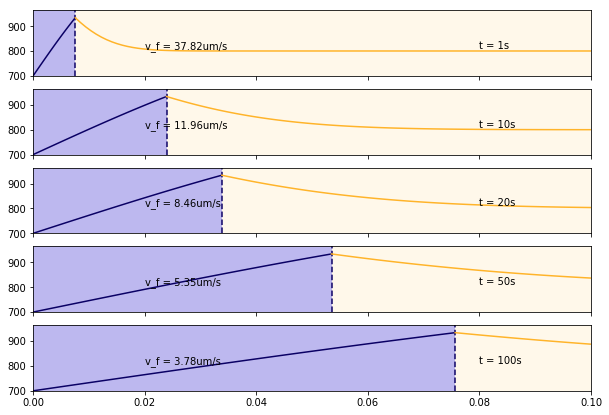

In [34]:
plot_profiles(700,800,[1,10,20,50,100],0.1[1,10,20,50,100])

Case 2: $T_\infty < T_w < T_m$

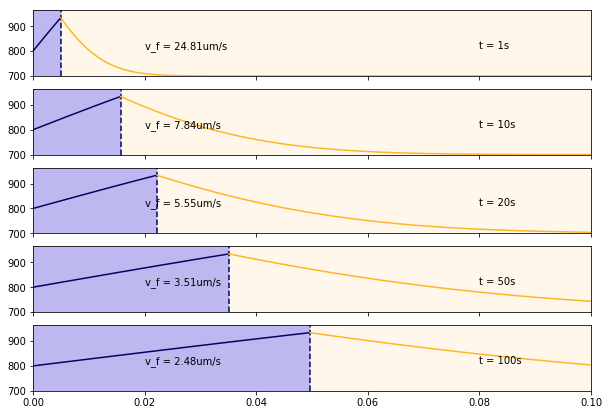

In [35]:
plot_profiles(800,700,[1,10,20,50,100],0.1)

Case 3: $T_w < T_m < T_\infty$

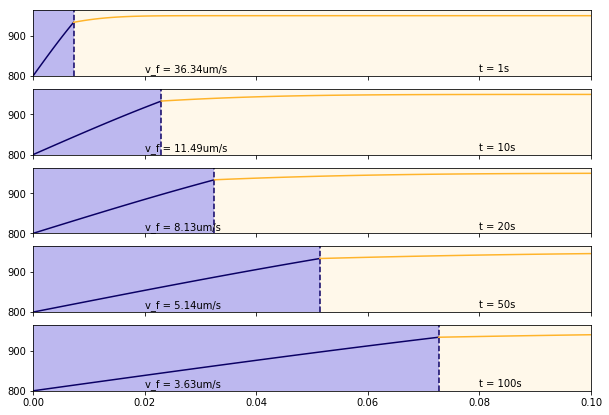

In [36]:
plot_profiles(800,950,[1,10,20,50,100],0.1)

### Simplified (Neumann) solution

A simple way to solve for the fraction solidified is to assume fast diffusion in the solid and equilibrium of the liquid, so that the temperature profile in the solid is linear and is constant in the liquid.

This gives:

$$f_s = -\frac{1}{Bi} + \sqrt{\frac{1}{{Bi}^2} + 2 St F_0}$$

where,

$f_s$ is the fraction solidified

$Bi = \frac{hL}{k_s}$ is the Biot Number

$St = \frac{T_m - T_\infty}{\rho L_f/C_p}$ is the Stefan Number

$F_0 = \frac{\alpha_s T}{L^2}$ is the Fourier number

The wall temperature can be given by:

$T_w = \frac{T_m + Bi T_\infty}{1+Bi}$

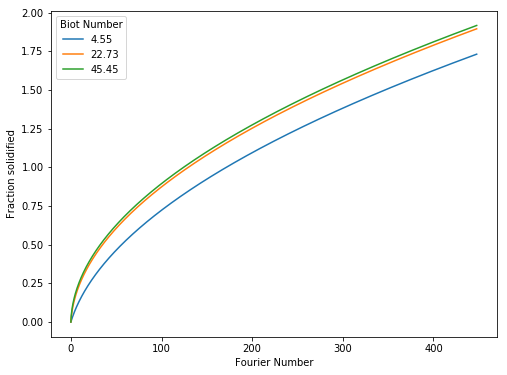

In [24]:
# Solving for T_inf of 750, 800, 850 C, and h = 1000, 5000, 10000 J/(Ks)
# L = 1m

Bi_list = np.array([1000, 5000, 10000])/k_s

St_list = (-np.array([750, 800, 850]) + T_m)/(rho*L_f/C_p)

F0_list = a_s*np.linspace(0,5000000,1000)

# Solving for three different h

fig,ax = plt.subplots(figsize=(8,6))

for Bi in Bi_list:
    
    f_s = -1/Bi + np.sqrt(1/np.power(Bi,2) + 2*St_list[1]*F0_list)
    ax.plot(F0_list,f_s,label=str(np.round(Bi,2)))

ax.set_xlabel('Fourier Number')
ax.set_ylabel('Fraction solidified')

ax.legend(title="Biot Number")

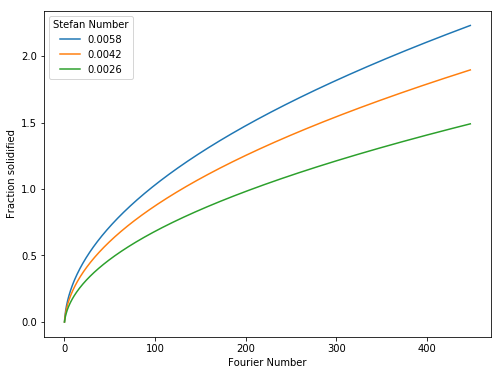

In [25]:
# Solving for three different T_inf

fig,ax = plt.subplots(figsize=(8,6))

for St in St_list:
    
    f_s = -1/Bi_list[1] + np.sqrt(1/np.power(Bi_list[1],2) + 2*St*F0_list)
    ax.plot(F0_list,f_s,label=str(np.round(St,4)))

ax.set_xlabel('Fourier Number')
ax.set_ylabel('Fraction solidified')

ax.legend(title="Stefan Number")